In [50]:
# Import statements + setup
import numpy as np
import pandas as pd

###############################
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder

###############################
# Visualization
import seaborn as sns
sns.set_style("whitegrid")
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.cm as cm
###############################

#########################################################################
# Set this to displays the enitre data:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)
#########################################################################

import warnings
warnings.filterwarnings('ignore')

def get_subset_exact(data, column, column_value):

    """
    This function generates subsets based on categorical column value
    Parameters:
    data: data to filter -> Dtype: data frame
    column: filter based on this column -> Dtype: string
    column value: values that are equal to this are filterd -> Dtype: string
    """    
    mask = data[column] == column_value
    data_mask = data[mask]

    return data_mask

In [80]:
nyt_raw_data = pd.read_csv('NYT.csv')
nyp_raw_data = pd.read_csv('NYP.csv')
fox_raw_data = pd.read_csv('Fox.csv')

In [112]:
nyt_trans_data = get_subset_exact(nyt_raw_data, 'Aspect', 'Trans')
nyp_trans_data = get_subset_exact(nyp_raw_data, 'Aspect', 'Trans')
fox_trans_data = get_subset_exact(fox_raw_data, 'Aspect', 'Trans')

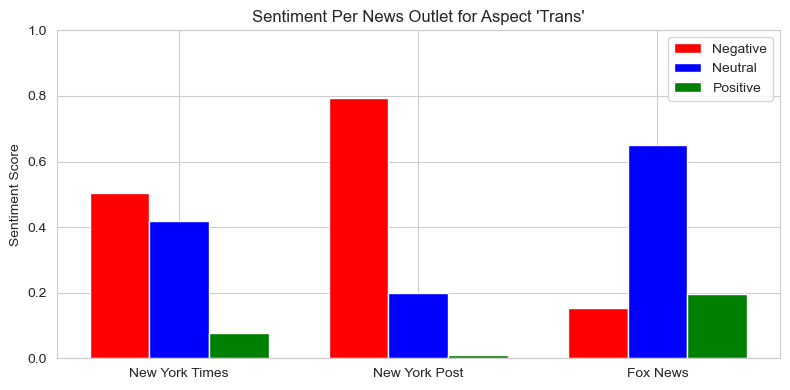

In [224]:
# labels and data
x_labels = ['New York Times', 'New York Post', 'Fox News']
x = np.arange(len(x_labels))  # positions for the groups
bar_width = 0.25

negatives = [nyt_trans_data['Negative Aspect'].item(), 
             nyp_trans_data['Negative Aspect'].item(), 
             fox_trans_data['Negative Aspect'].item()]

neutrals = [nyt_trans_data['Neutral Aspect'].item(), 
            nyp_trans_data['Neutral Aspect'].item(), 
            fox_trans_data['Neutral Aspect'].item()]

positives = [nyt_trans_data['Positive Aspect'].item(), 
             nyp_trans_data['Positive Aspect'].item(), 
             fox_trans_data['Positive Aspect'].item()]

# make plot
plt.figure(figsize=(8, 4))

plt.bar(x - bar_width, negatives, width=bar_width, color='red', label='Negative')
plt.bar(x, neutrals, width=bar_width, color='blue', label='Neutral')
plt.bar(x + bar_width, positives, width=bar_width, color='green', label='Positive')

# x-axis settings
plt.xticks(x, x_labels)

# y-axis setting
plt.ylim(0, 1)
plt.ylabel("Sentiment Score")

# legend and title
plt.legend()
plt.title("Sentiment Per News Outlet for Aspect 'Trans'")
plt.tight_layout()
plt.savefig("trans_sentiment.png")
plt.show()